# Analisis de la curva de luz de la estrella $\beta$-Lyrae


In [2]:
# Load los paquetes a usar
pacman::p_load('WaveletComp', 'lomb', 'astsa', 'dplyr')

In [3]:
data= read.csv('~/Downloads/Spectral analisis/Trabajo final/BETA_LYRAE_tess2019198215352-s0014-0000000028569279-0150-s.csv', header = T)

In [4]:
head(data)

TIME     TIMECORR    CADENCENO SAP_FLUX SAP_FLUX_ERR SAP_BKG  SAP_BKG_ERR
1 1683.352 0.003235988 328243         NA        NA           NA       NA   
2 1683.353 0.003235973 328244         NA        NA           NA       NA   
3 1683.354 0.003235959 328245         NA        NA           NA       NA   
4 1683.356 0.003235944 328246         NA        NA           NA       NA   
5 1683.357 0.003235929 328247    1414446  127.0448     15645.88 10.88139   
6 1683.359 0.003235915 328248    1414601  127.0506     15626.50 10.87491   
  PDCSAP_FLUX PDCSAP_FLUX_ERR QUALITY PSF_CENTR1 PSF_CENTR1_ERR PSF_CENTR2
1      NA           NA        168     NA         NA             NA        
2      NA           NA         32     NA         NA             NA        
3      NA           NA         32     NA         NA             NA        
4      NA           NA         32     NA         NA             NA        
5 1502252     145.6564          0     NA         NA             NA        
6 1503892     145.6631          0     NA         NA             NA        
  PSF_CENTR2_ERR MOM_CENTR1 MOM_CENTR1_ERR MOM_CENTR2 MOM_CENTR2_ERR POS_CORR1 
1 NA                   NA             NA         NA             NA           NA
2 NA                   NA             NA         NA             NA           NA
3 NA                   NA             NA         NA             NA           NA
4 NA                   NA             NA         NA             NA           NA
5 NA             1882.755   0.0001045108   613.3657   8.792200e-05   0.01644231
6 NA             1882.755   0.0001045008   613.3657   8.791767e-05   0.01450529
  POS_CORR2 
1         NA
2         NA
3         NA
4         NA
5 0.02258117
6 0.02524241

In [5]:
# Limpiar los datos, se estudia el SAP y PDC flux filtrado por Quality=0 y tiempo
data1= data %>% dplyr::select(TIME, SAP_FLUX, PDCSAP_FLUX, QUALITY)

data1= data1[data1$QUALITY==0,]

df1= as.data.frame(data1)

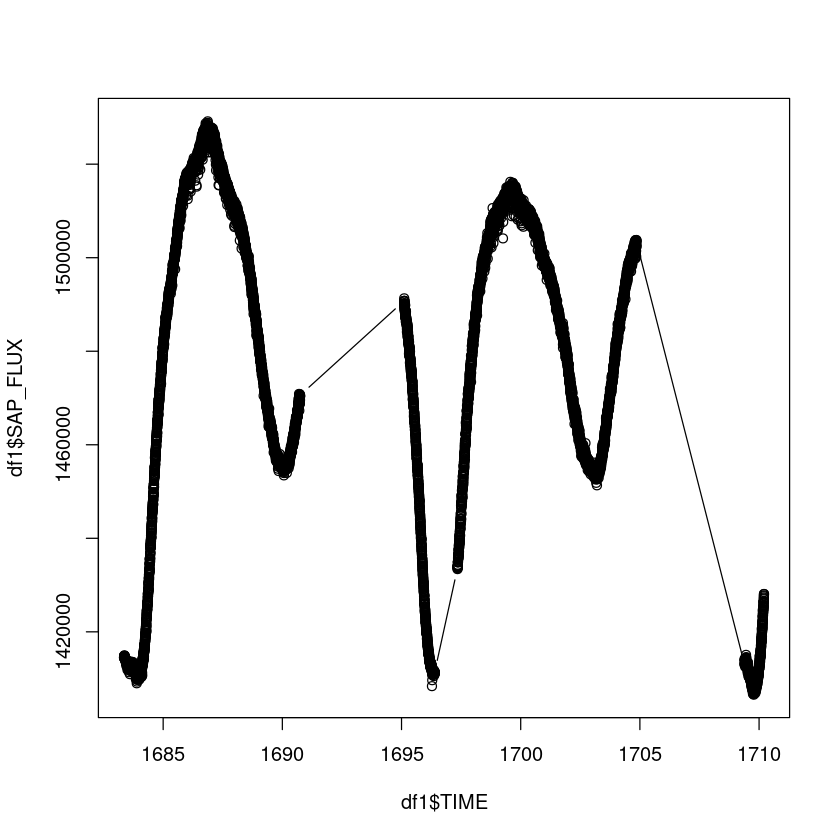

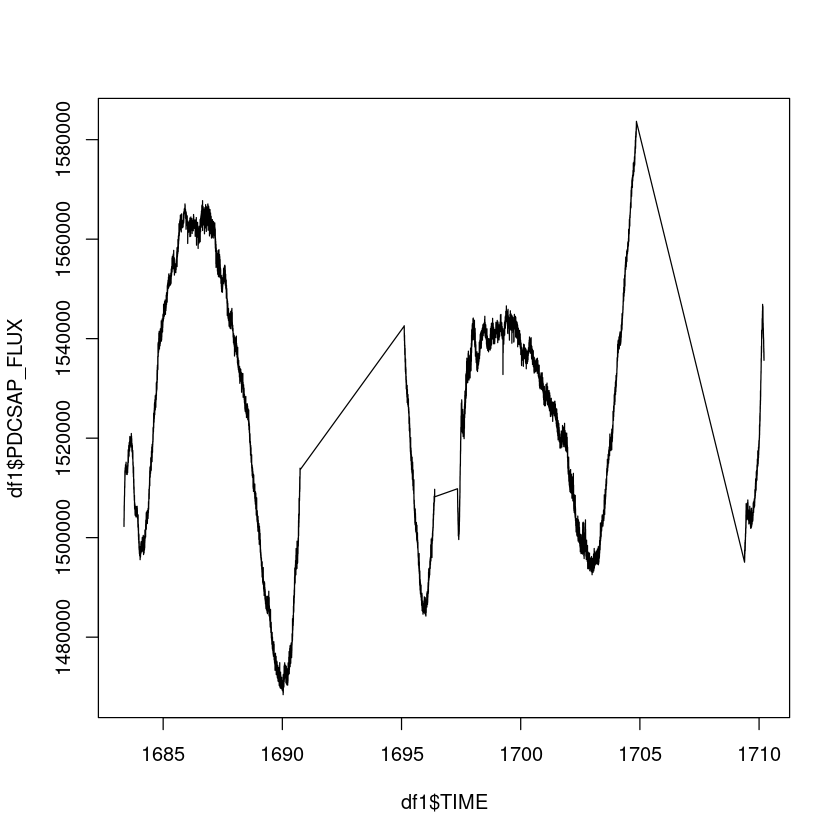

In [12]:
# Graficamos la series en que se ven discontinuidades
# Existen gaps de missing data entre 1690-1695, 166-1697 y 1705-1709
plot(df1$TIME, df1$SAP_FLUX, type='b');
plot(df1$TIME, df1$PDCSAP_FLUX, type='b')

In [27]:
# Realizamos analisis de funcion densidad espectral, mediante metodo directo, 
# Wlech Overlapping Segmented Averagin y Multitaper
ts.plot(sapa::SDF(df1$SAP_FLUX, method='direct'), xlim=c(0,100));
ts.plot(sapa::SDF(df1$SAP_FLUX, method = 'wosa'), xlim=c(0,100));
ts.plot(sapa::SDF(df1$SAP_FLUX, method= 'multitaper'), xlim=c(0,100));

ts.plot(sapa::SDF(df1$PDCSAP_FLUX, method='direct'), xlim=c(0,100));
ts.plot(sapa::SDF(df1$PDCSAP_FLUX, method = 'wosa'), xlim=c(0,100));
ts.plot(sapa::SDF(df1$PDCSAP_FLUX, method= 'multitaper'), xlim=c(0,100));


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


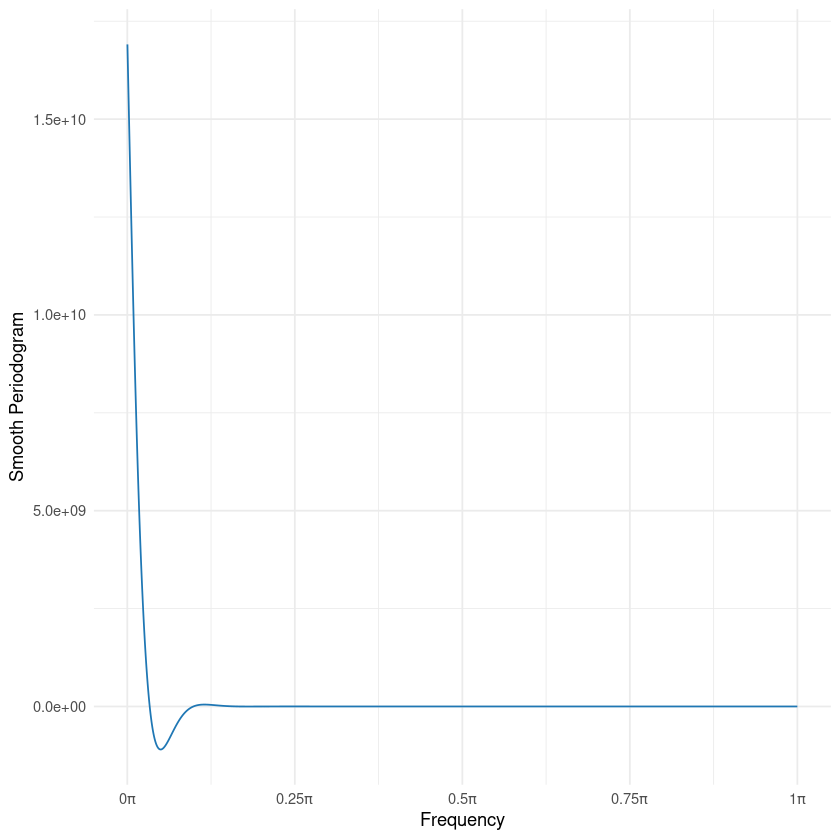

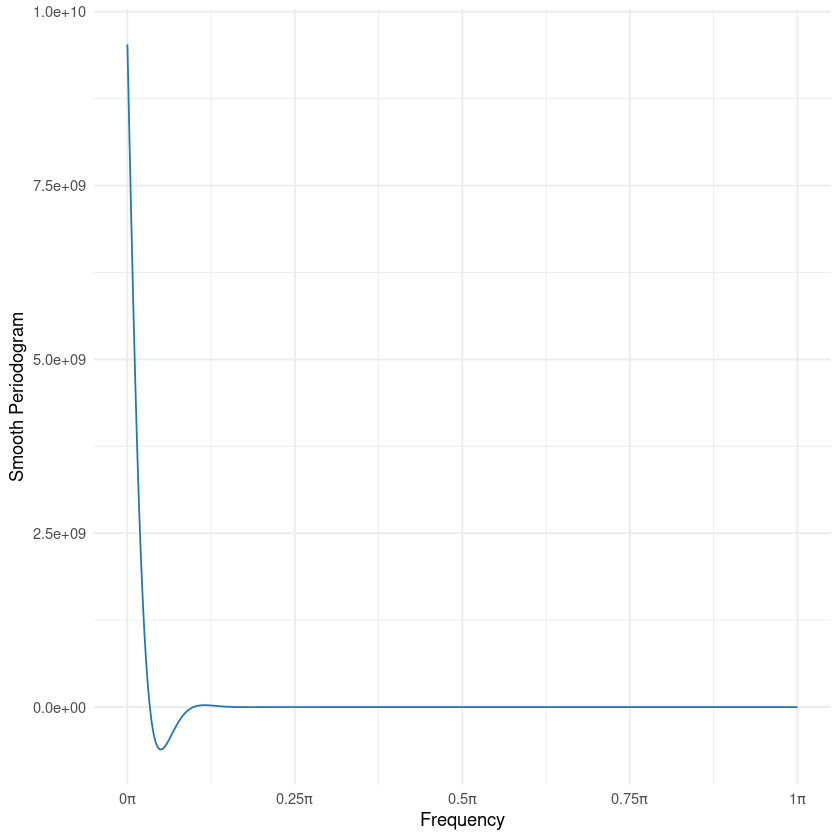

In [20]:
# Luego realizamos un periodograma suavizado a las curvas
# Se realizo un suavizado 0.7, que presenta la "mejor" curva vizualmente
periodograma1= LSTS::smooth.periodogram(df1$SAP_FLUX, spar=.7)
periodograma1$plot
periodograma2= LSTS::smooth.periodogram(df1$PDCSAP_FLUX, spar=.7)
periodograma2$plot

In [12]:
## Periodograma de Lomb-scargle en frecuencia y periodo, normalizado mediante
# $1/2*\sigma^2$
lomb::lsp(df1$SAP_FLUX, ofac=2, normalize = 'press', type= 'frequency');
lomb::lsp(df1$SAP_FLUX, ofac=2, normalize = 'press', type= 'period')

lomb::lsp(df1$PDCSAP_FLUX, ofac=2, normalize = 'press', type= 'frequency');
lomb::lsp(df1$PDCSAP_FLUX, ofac=2, normalize = 'press', type= 'period')

Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span

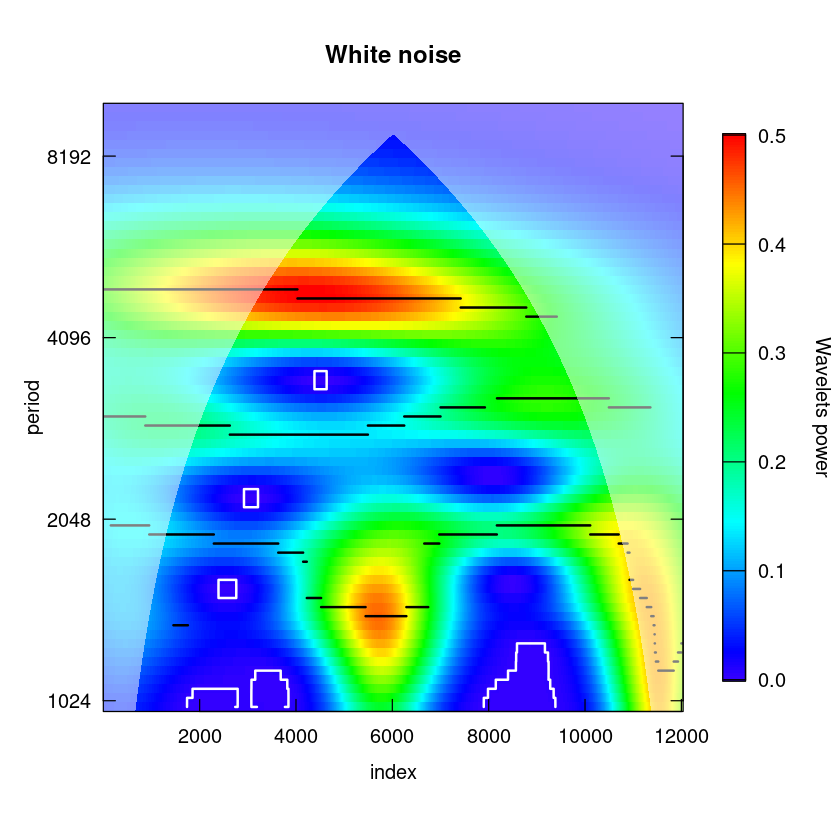

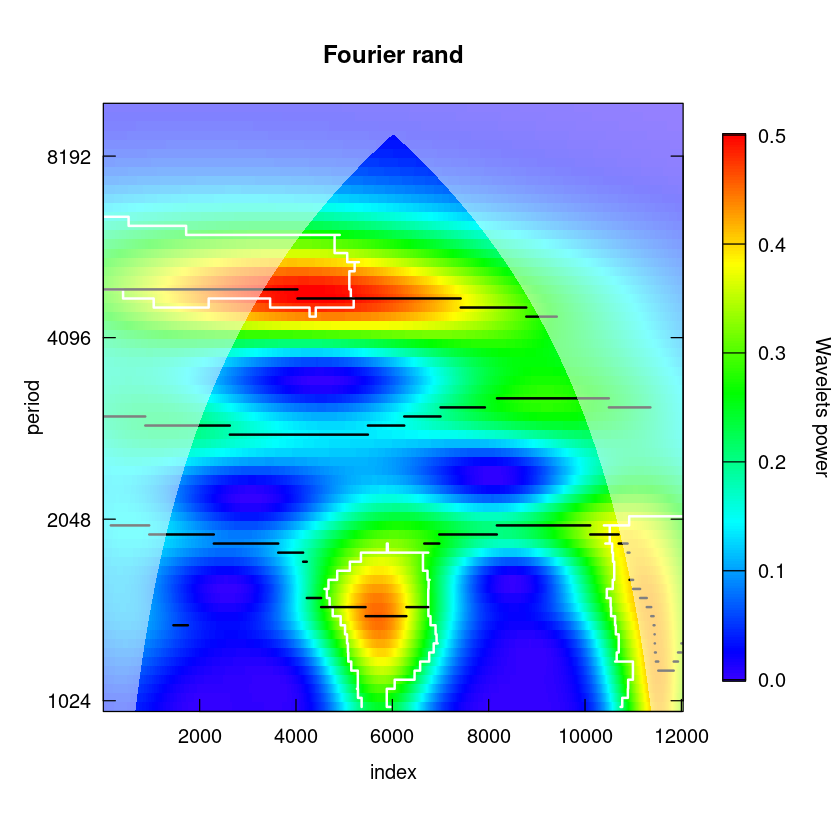

Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span

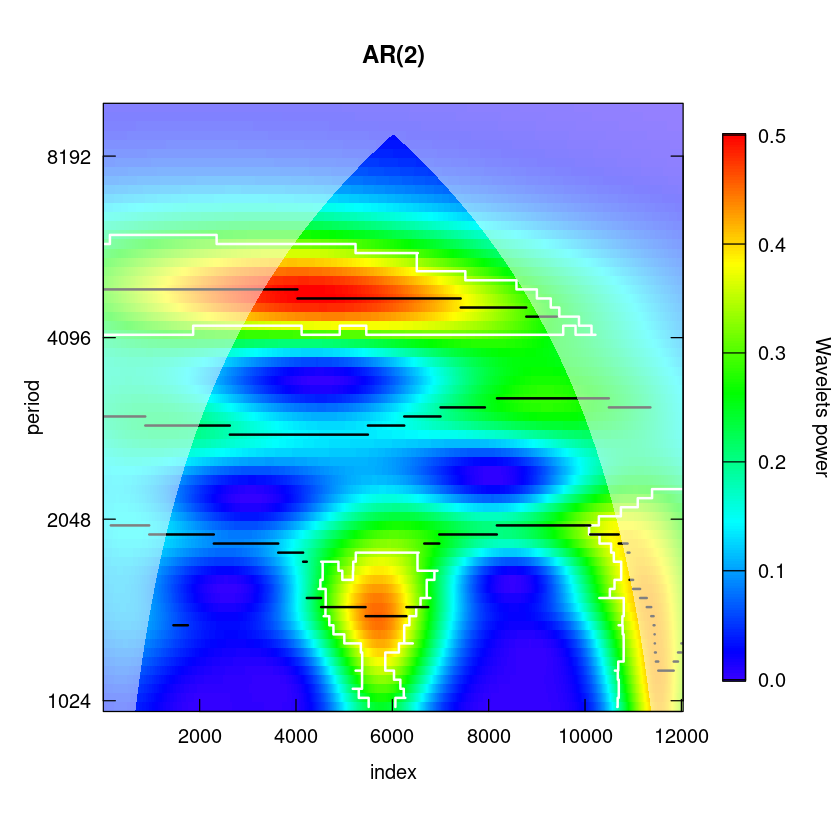

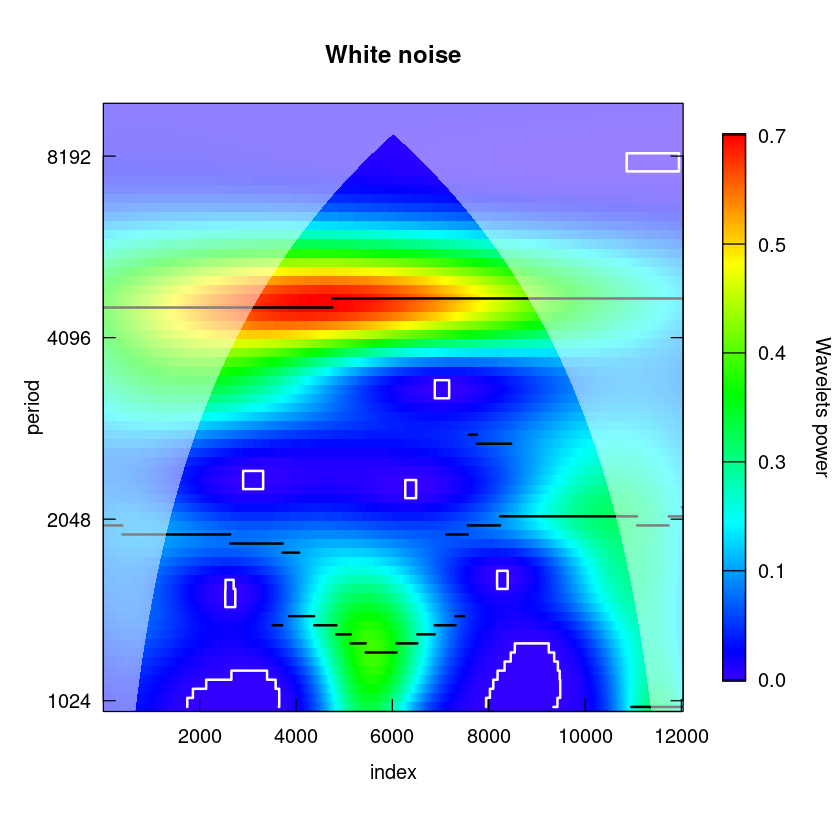

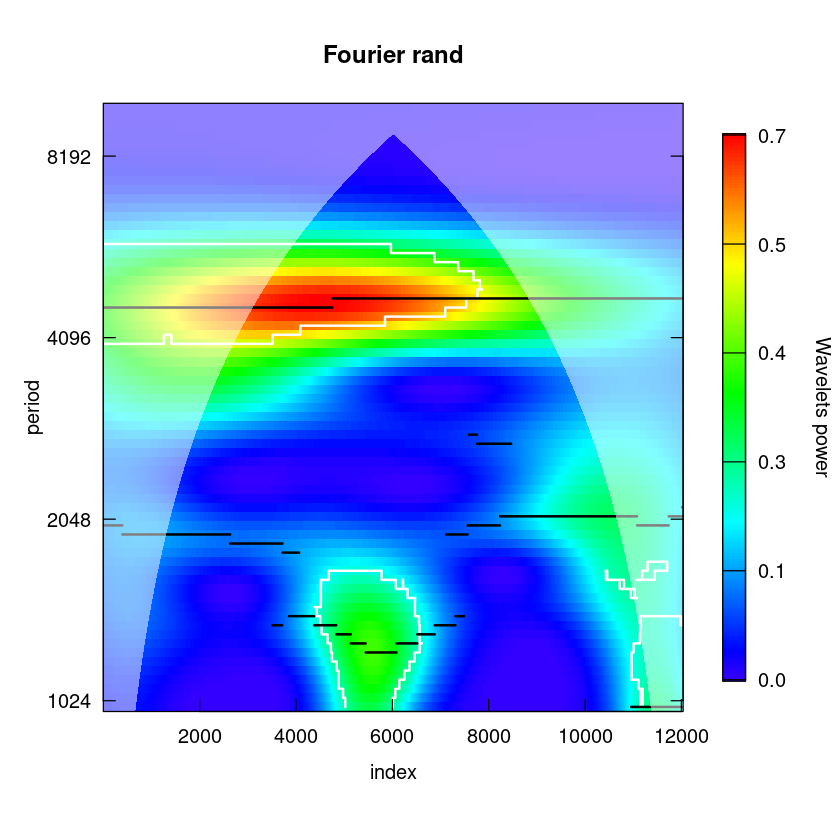

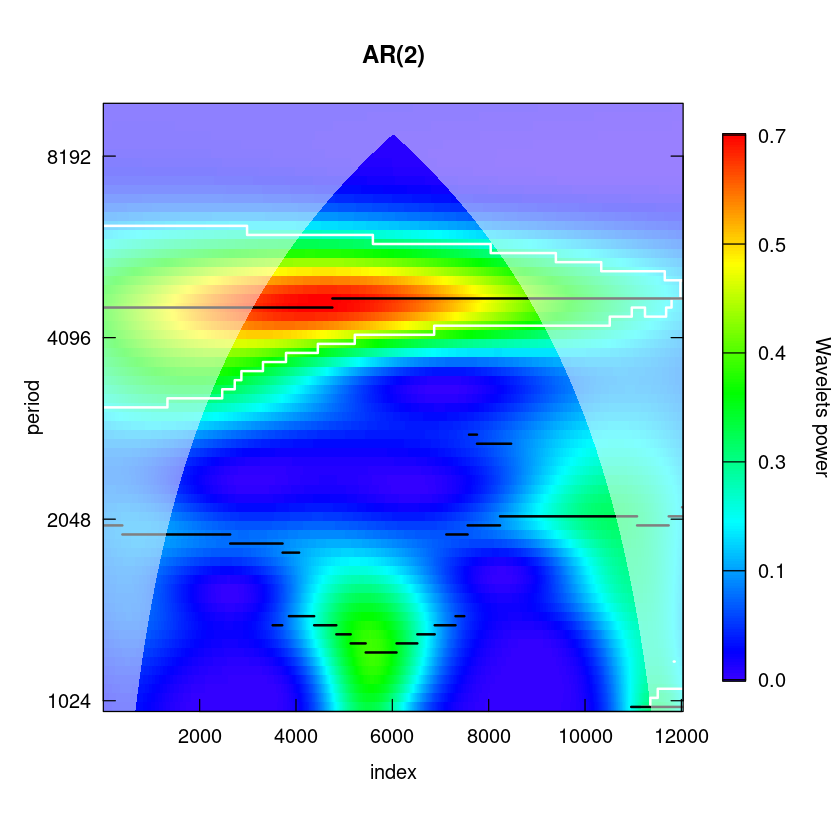

In [24]:
## Finalmente se realizo un Scalograma usando los metodos de ruido blanco, simular una TS con 
# espectro similar y un proceso AR(2)

scal1= WaveletComp::analyze.wavelet(df1, my.series = 'SAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'white.noise')
scal2= WaveletComp::analyze.wavelet(df1, my.series = 'SAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'Fourier.rand')
scal3= WaveletComp::analyze.wavelet(df1, my.series = 'SAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'AR', params= list(2))
WaveletComp::wt.image(scal1, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'White noise')
WaveletComp::wt.image(scal2, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'Fourier rand')
WaveletComp::wt.image(scal3, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'AR(2)')


[1] 3090.317

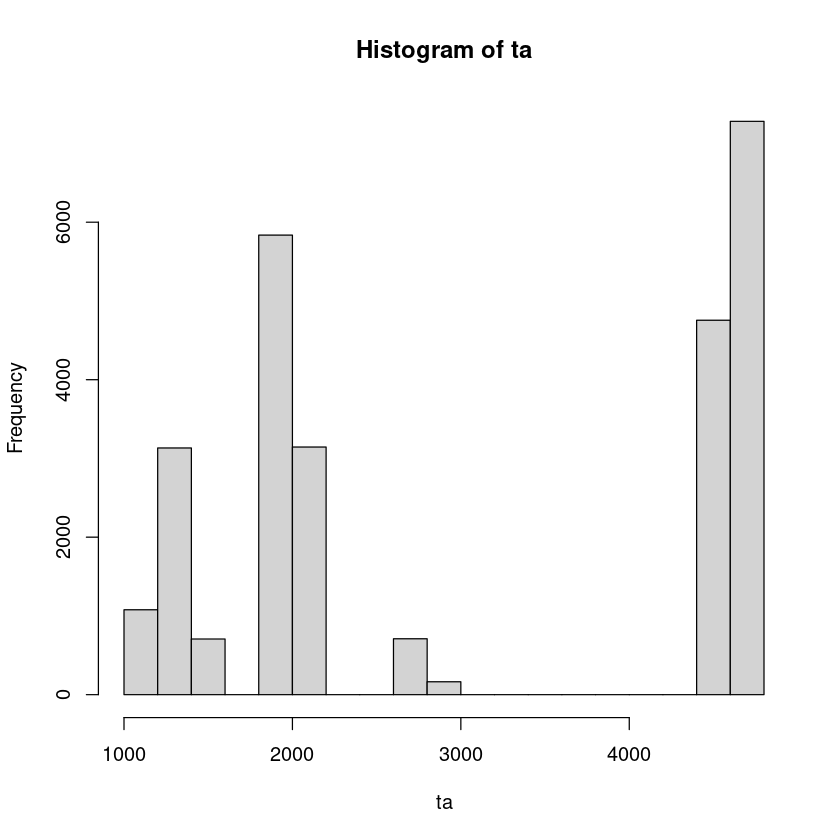

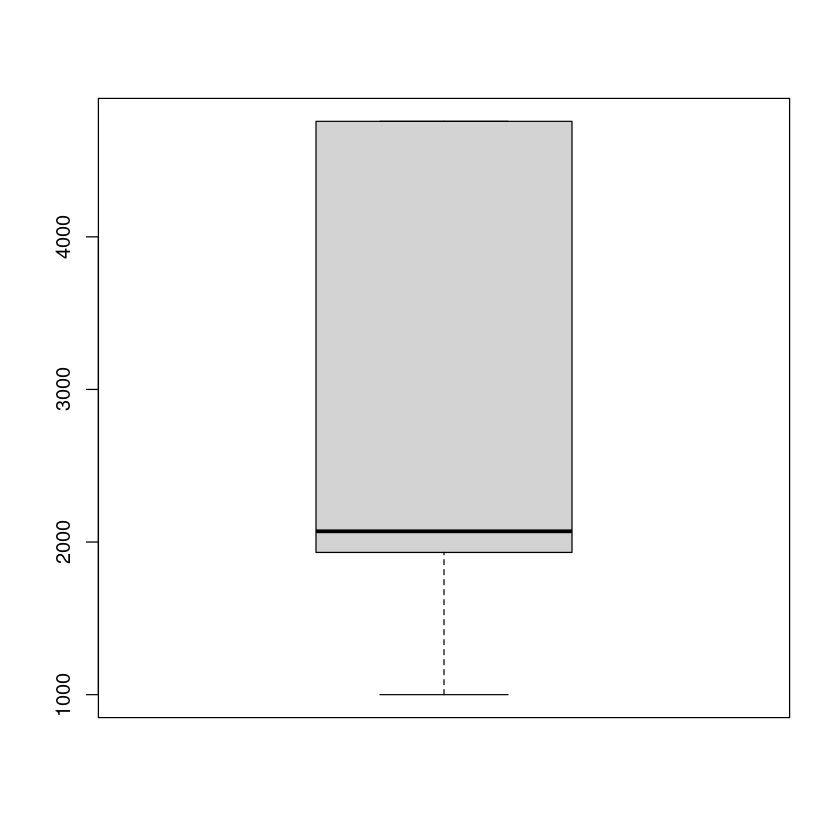

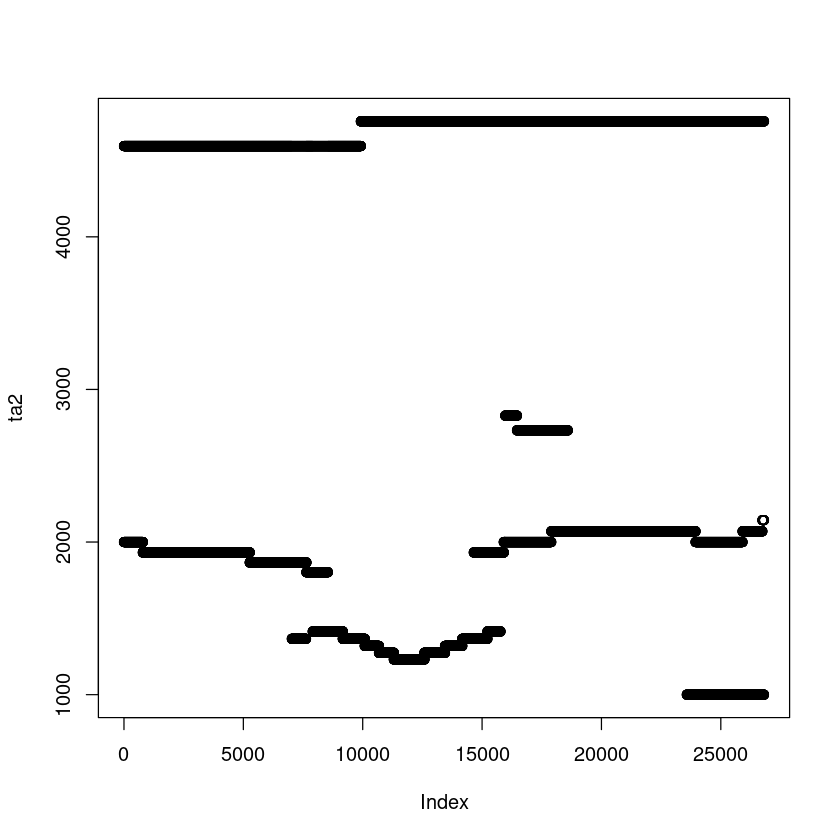

In [25]:
# Histogramas sobre los periodos
ta= scal1$Period[which(scal1$Ridge==1, arr.ind = T)[,1]]
mean(ta);
hist(ta);
boxplot(ta);
ta2= scal2$Period[which(scal2$Ridge==1, arr.ind = T)[,1]]
plot(ta2)

Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...
Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 
Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...


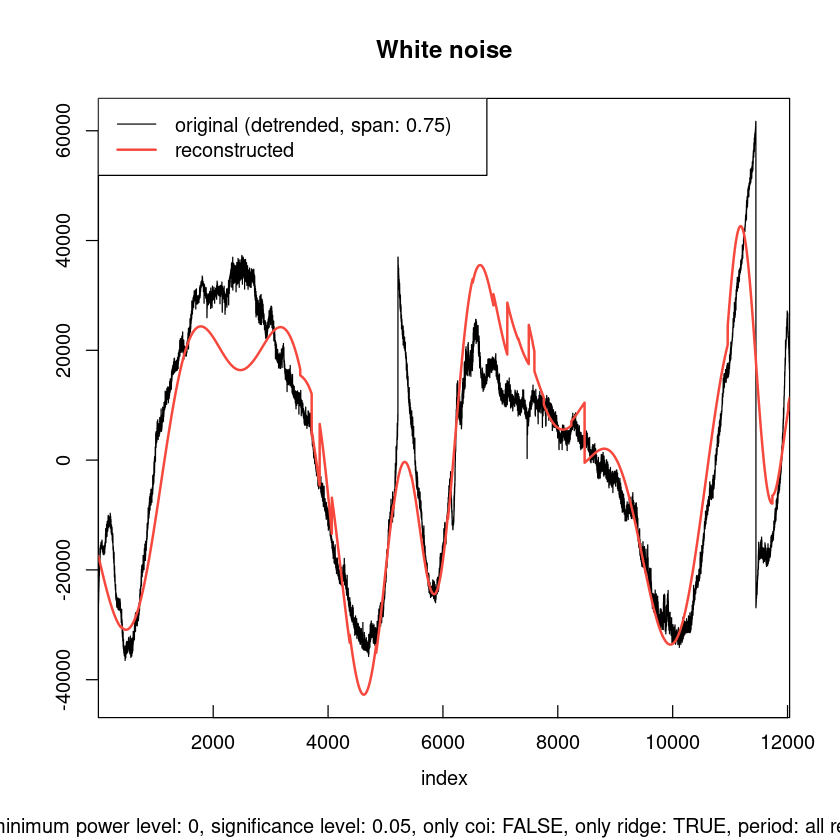

Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 
Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...


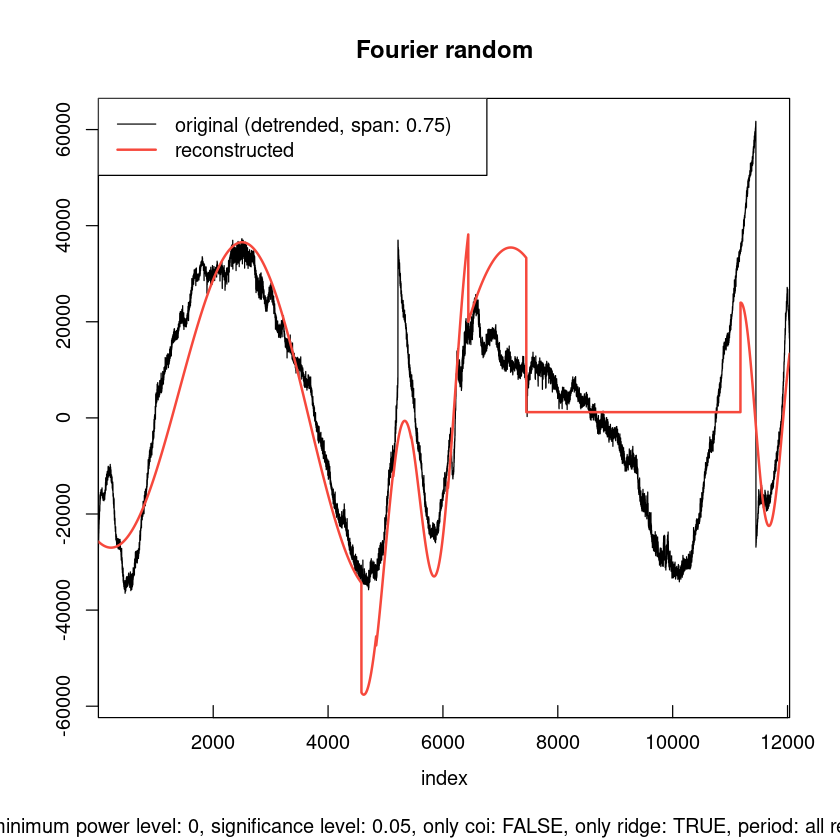

Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 


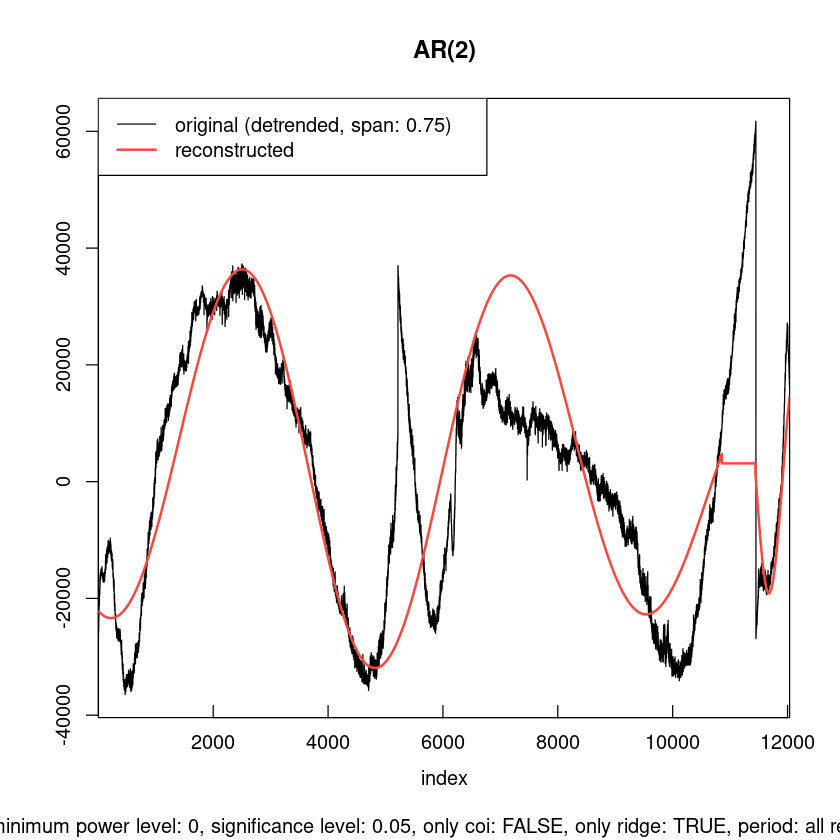

In [26]:
# Intentar reconstruir las curvas
WaveletComp::reconstruct(scal1, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'White noise');
WaveletComp::reconstruct(scal2, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'Fourier random');
WaveletComp::reconstruct(scal3, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'AR(2)')

Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span

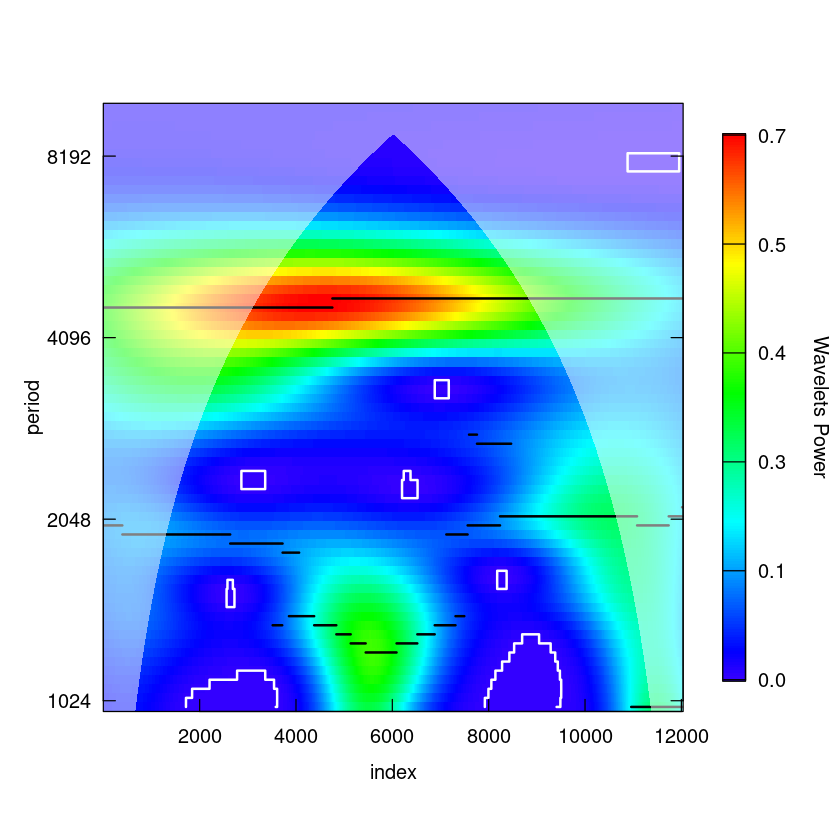

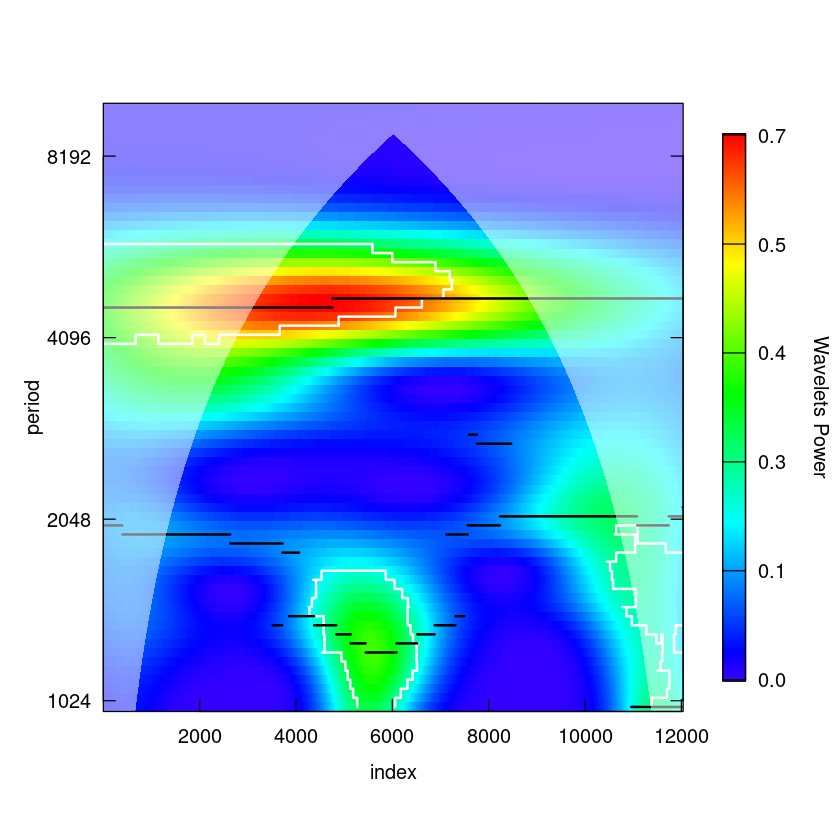

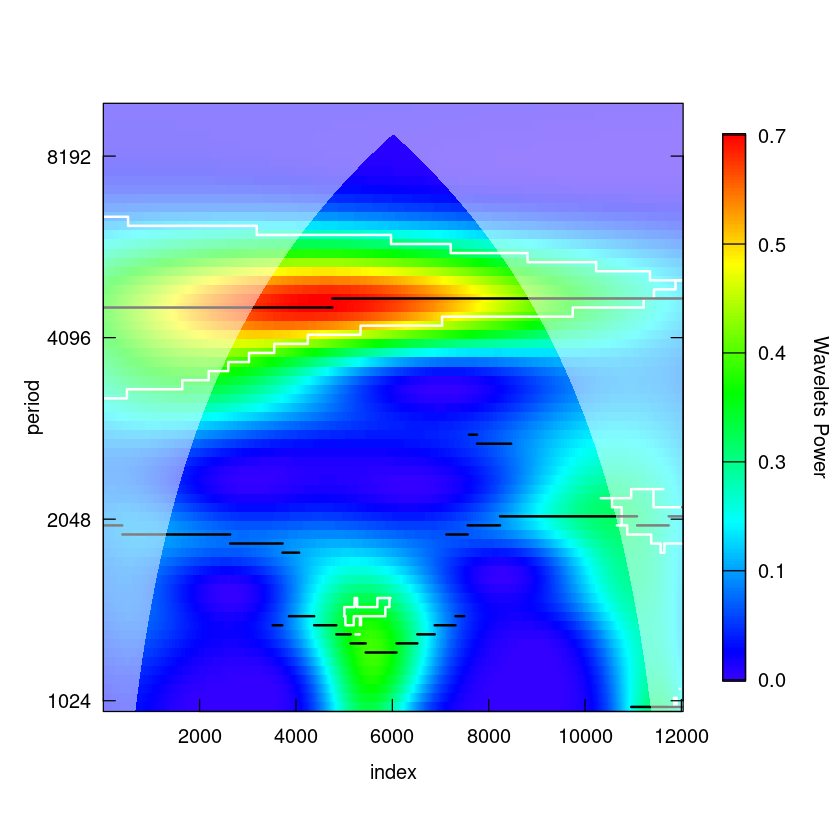

In [15]:
scal1= WaveletComp::analyze.wavelet(df1, my.series = 'PDCSAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'white.noise')
scal2= WaveletComp::analyze.wavelet(df1, my.series = 'PDCSAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'Fourier.rand')
scal3= WaveletComp::analyze.wavelet(df1, my.series = 'PDCSAP_FLUX', lowerPeriod= 1000, upperPeriod= 10000, n.sim= 50, method= 'AR', params= list(2))
WaveletComp::wt.image(scal1, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'White noise')
WaveletComp::wt.image(scal2, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'Fourier rand')
WaveletComp::wt.image(scal3, color.key = 'i', n.levels=200, legend.params = list(lab= 'Wavelets power', mar=5), main= 'AR(2)')

Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...
Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 
Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...


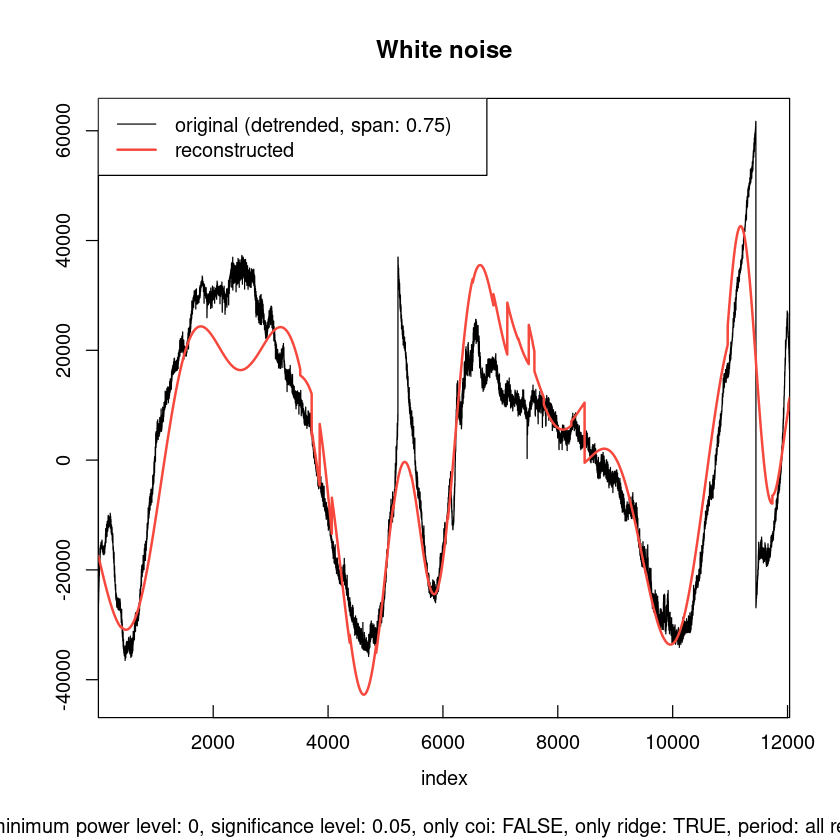

Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 
Your input object class is 'analyze.wavelet'...
Your time series 'PDCSAP_FLUX' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...


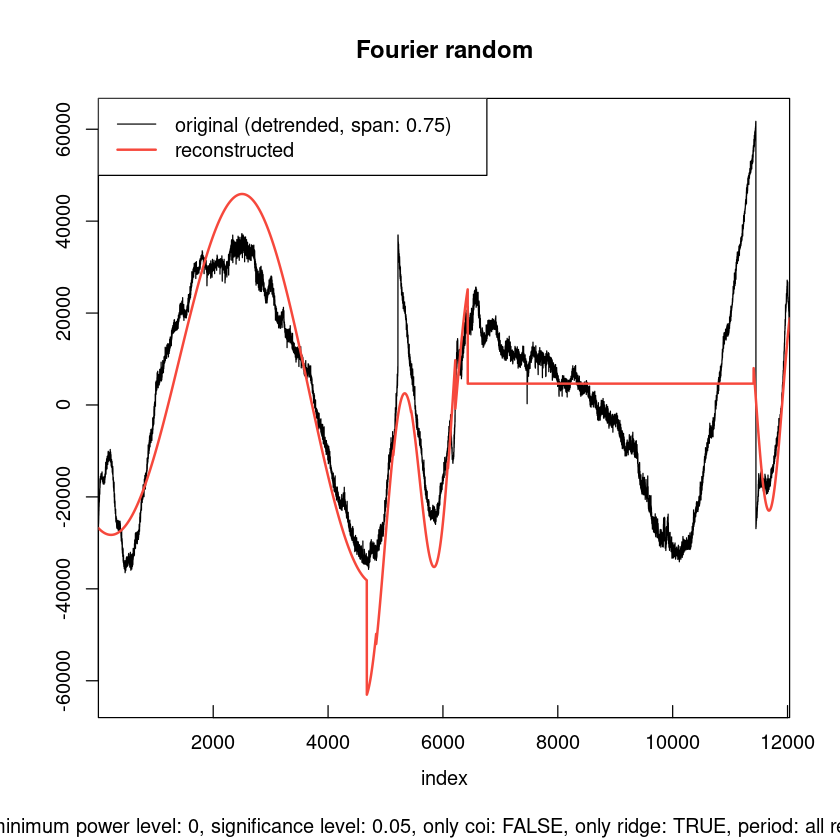

Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 


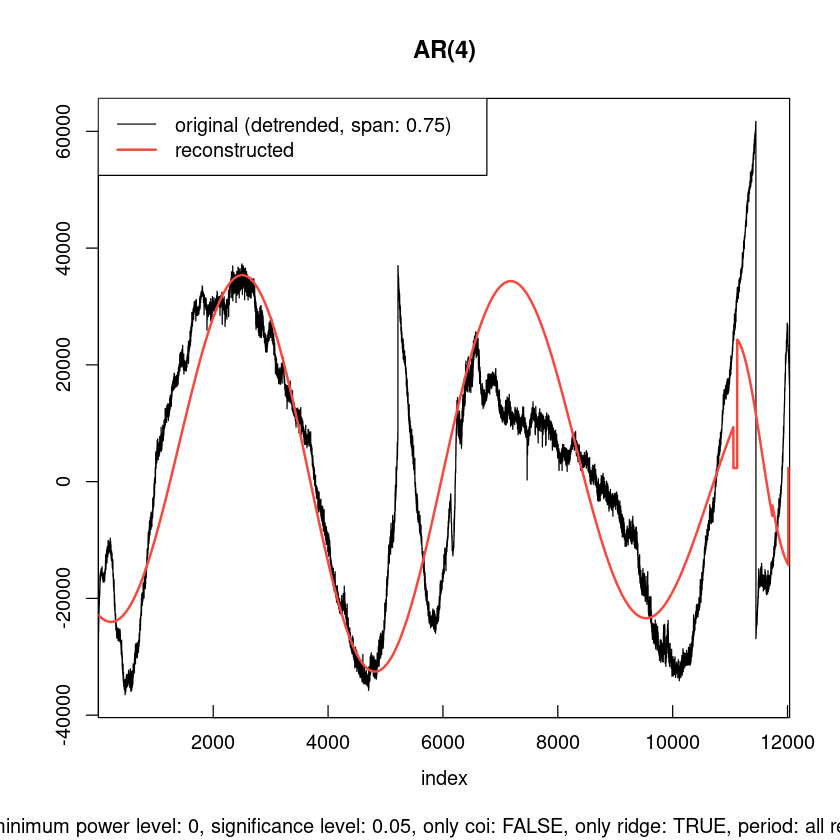

In [16]:
WaveletComp::reconstruct(scal1, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'White noise');
WaveletComp::reconstruct(scal2, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'Fourier random');
WaveletComp::reconstruct(scal3, plot.waves = F, lwd=c(1,2), only.ridge = T, main.rec = 'AR(2)')

# Conclusión